# World Happiness Report 2021

## What were people asked about? -  data sources and variable definitions

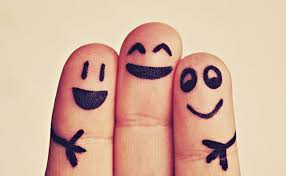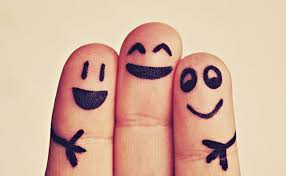

### Variables 

**Ladder score** - Happiness score or subjective well-being. This is the national average response to the question of life evaluations. 
*  Question: *Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?*

**Logged GDP per capita** - *The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.*

**Social support** - *Is the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not.*

**Healthy life expectancy** - *Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository (Last updated: 2020-09-28)*

**Freedom to make life choices** - *Is is the national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?*

**Generosity** - *Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.*

**Perceptions of corruption** - *The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”*

**Ladder score in Dystopia** - *It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors.*


More information about a survey: https://worldhappiness.report/ed/2021/

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 10

In [ ]:
data_report_2021 = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv')
data_report_old = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report.csv')

In [ ]:
data_report_2021.head()

In [ ]:
def set_region_label(regional_indicator):
    '''
    Assign to each regional indicator the main region.
    
    Parameters:
        regional_indicator: column from the dataset data_report_2021
    '''
    if regional_indicator in ['Central and Eastern Europe', 'Western Europe']:
        return 'Europe'
    elif regional_indicator in ['East Asia', 'South Asia', 'Southeast Asia']:
        return 'Asia'
    elif regional_indicator in ['Middle East and North Africa', 'Sub-Saharan Africa']:
        return 'Africa'
    elif regional_indicator == 'Commonwealth of Independent States':
        return 'Commonwealth of Independent States'
    elif regional_indicator == 'Latin America and Caribbean':
        return 'Latin America and Caribbean'
    elif regional_indicator == 'North America and ANZ':
        return 'North America and ANZ'

In [ ]:
data_report_2021['region_label'] = data_report_2021['Regional indicator'].apply(set_region_label)

In [ ]:
describing_variables = list(data_report_2021.columns[data_report_2021.columns.str.startswith('Explained')])
describing_variables.append('region_label')

<a id="1"></a>
# <div class="alert alert-block alert-info">A general look at measure of happiness in 2021</div> 

# How many countries are in each region (survey 2021) ?

In [ ]:
print(data_report_2021['region_label'].value_counts())

# Main summary statistics

In [ ]:
summary_region = data_report_2021[['Regional indicator','Ladder score','region_label']].groupby(['region_label','Regional indicator']).agg(['mean','max','min', 'median'])
summary_region.columns = ['{}_{}'.format(col[0], col[1]) for col in summary_region.columns]
summary_region.reset_index(inplace = True)
summary_region

In [ ]:
summary_region.sort_values(by = 'Ladder score_mean', ascending = False, inplace = True)

In [ ]:
sns.set(font_scale = 2, rc={'figure.figsize':(15,10)})
region_plot_score = sns.barplot(x=summary_region['Ladder score_mean'],y=summary_region['Regional indicator'])
region_plot_score.set_title('Mean score of happiness in each region in 2021', size = 20)
region_plot_score.set_xlabel(region_plot_score.get_xlabel(), fontsize=15)
region_plot_score.set_ylabel(region_plot_score.get_ylabel(), fontsize=15);

# The representation of the distribution of score of happiness in each region (2021)
## We should keep in mind that it occurs a disparity in scores in some regions. It will influence the aggregating results.

In [ ]:
sns.set(font_scale = 2, rc={'figure.figsize':(15,10)})
region_swarm_score = sns.swarmplot(x="Ladder score", y="region_label", data=data_report_2021, size = 15)
region_swarm_score.set_title('Swarmplot of happiness score in regions')
region_swarm_score.set_ylabel('');

<a id="1"></a>
# <div class="alert alert-block alert-info">Response results in 2021</div> 

In [ ]:
sns.set(font_scale = 1.5, rc={'figure.figsize':(20,15)})
plot_describing_variables = sns.pairplot(data=data_report_2021, vars = describing_variables[:3], hue="region_label", diag_kind="hist", size = 5, height=7, plot_kws={'s':50})
plot_describing_variables.fig.suptitle('Pair Plot of Socioeconomic Data in 2021', size = 30);

In [ ]:
def create_combined_plots(data, columname):
    '''
    Draws combined two plots depends on score of hapiness (scateer plot and density plot) grouping by region.
    
    Parameters:
        data: the dataset data_report_2021
        columname: the name of column (independent variable) from data_report_2021 dataset
    '''
    sns.set(font_scale = 1.2)
    plot = sns.jointplot(x = columname, y = 'Ladder score', data = data, hue = 'region_label', height =10, joint_kws=dict(sizes = 50))
    plot

## **Healthy life expectancy**

In [ ]:
create_combined_plots(data = data_report_2021, columname = 'Healthy life expectancy');

## **Logged GDP per capita**

In [ ]:
create_combined_plots(data = data_report_2021, columname = 'Logged GDP per capita');

## **Social support**

In [ ]:
create_combined_plots(data = data_report_2021, columname = 'Social support');

## **Freedom to make life choices**

In [ ]:
create_combined_plots(data = data_report_2021, columname = 'Freedom to make life choices');

## **Generosity**

## An interesting fact is that the level of generosity in almost all countries is similar. It is not a significant disproportion between them compared to other presenting plots, for example, Social support or Logged GDP per capita. 

In [ ]:
create_combined_plots(data = data_report_2021, columname = 'Generosity');

## **Perceptions of corruption**

In [ ]:
create_combined_plots(data = data_report_2021, columname = 'Perceptions of corruption');

<a id="1"></a>
# <div class="alert alert-block alert-info">Where lived the happiest people in 2021 ?</div> 

In [ ]:
'They are living in {}.'.format(data_report_2021[data_report_2021['Ladder score'] == max(data_report_2021['Ladder score'])]['Country name'].to_string(index = False))

<a id="1"></a>
# <div class="alert alert-block alert-info">Where lived the least happy people in 2021 ?</div> 

In [ ]:
'They are living in {}.'.format(data_report_2021[data_report_2021['Ladder score'] == min(data_report_2021['Ladder score'])]['Country name'].to_string(index = False))

<a id="1"></a>
# <div class="alert alert-block alert-info"> What's differentiates the top 10 happiest countries out of the rest?</div> 

In [ ]:
happiest_countries = data_report_2021.sort_values('Ladder score', ascending = False).head(10)
happiest_countries['level'] = 'happiest'
unhappiest_countries= data_report_2021.sort_values('Ladder score', ascending = True).head(10)
unhappiest_countries['level'] = 'unhappiest'

top_countries = pd.concat([happiest_countries, unhappiest_countries], ignore_index=True)

In [ ]:
top_countries.groupby('region_label')['level'].value_counts().sort_values().unstack().fillna(0)

In [ ]:
color_condiction_level = ['red' if x < 7 else 'yellowgreen' for x in top_countries['Ladder score']] 
sns.set(font_scale = 2)
pp = sns.barplot(x="Ladder score", y="Country name", data=top_countries,
            label="Ladder score", palette = color_condiction_level);

for index, row in top_countries.iterrows():
    pp.text(row['Ladder score'], index, round(row['Ladder score'],2), color = 'black',  size = 'small')

pp.set_title('The top 10 the happiest countries and the unhappiest countries in 2021',  size = 30);

# Visual ways of presenting measures, which describe the top 10 happiest countries and the unhappiest countries in 2021

## Barplots

In [ ]:
colors = sns.color_palette("Paired")
explainable_variables = describing_variables[:-1]
sns.set(font_scale = 2)
sns.barplot(x=explainable_variables[0] , y="Country name", data=top_countries, label=explainable_variables[0], color=colors[1]);

In [ ]:
sns.barplot(x=explainable_variables[1] , y="Country name", data=top_countries, label=explainable_variables[1], color=colors[2]);

In [ ]:
sns.barplot(x=explainable_variables[2] , y="Country name", data=top_countries, label=explainable_variables[2], color=colors[3]);

## Dotplots

In [ ]:
rc={'axes.labelsize': 32, 'font.size': 32,  'axes.titlesize': 22, 'figure.figsize':(20,10)}
sns.set(rc=rc, font_scale=2)
g = sns.PairGrid(top_countries, x_vars=explainable_variables[3:6], y_vars="Country name",
                 height=15, aspect=.5)
g.map(sns.stripplot, size=20, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlim=(0, 2), xlabel="", ylabel="")


for ax, title in zip(g.axes.flat, explainable_variables[3:6]):

    ax.set(title=title)
    ax.set_xlabel(ax.get_xlabel(), fontsize = 90)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)


sns.despine(left=True, bottom=True)

<a id="1"></a>
# <div class="alert alert-block alert-info"> Dynamics of happiness</div> 

In [ ]:
print( "Countries, which participated in survey 2021: {}".format(len(data_report_2021['Country name'].unique())))
print( "Countries, which participate at least in the survey since 2006: {}".format(len(data_report_old['Country name'].unique())))

In [ ]:
region_dict = data_report_2021[['Country name','Regional indicator', 'region_label']]
data = data_report_old.merge(region_dict, how = 'left', on = 'Country name')

## Lists of countries with some lack response on surveys

In [ ]:
data[data['Regional indicator'].isnull()]['Country name'].value_counts()

In [ ]:
data_years = data[~data['region_label'].isnull()]

In [ ]:
mean_indicators_each_region = data.groupby(['region_label', 'year']).mean()
median_indicators_each_region = data.groupby(['region_label', 'year']).median()
mean_indicators_each_region.reset_index(inplace=True) 
median_indicators_each_region.reset_index(inplace=True) 

In [ ]:
sns.set_theme(style="whitegrid")
mean_score_time_plot = sns.lineplot(data=mean_indicators_each_region,x = 'year', y='Life Ladder' ,palette="tab10", linewidth=2.5, hue = 'region_label')
mean_score_time_plot.set_title('Mean score of happiness in time',  size = 30);
mean_score_time_plot.set_ylabel('mean score', fontsize=20)
mean_score_time_plot.set_xlabel('year', fontsize=20);

In [ ]:
sns.set_theme(style="whitegrid")
mean_score_time_plot = sns.lineplot(data=median_indicators_each_region,x = 'year', y='Life Ladder' ,palette="tab10", linewidth=2.5, hue = 'region_label')
mean_score_time_plot.set_title('Median score of happiness in time',  size = 30);
mean_score_time_plot.set_ylabel('median score', fontsize=20)
mean_score_time_plot.set_xlabel('year', fontsize=20);